## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error


## Load Data

In [3]:
df = pd.read_csv("Battery_RUL.csv")
df.head(3)

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.4885,3.670,3.211,5460.001,6755.01,10777.82,1112
1,2.0,7408.64,1172.5125,4.246,3.220,5508.992,6762.02,10500.35,1111
2,3.0,7393.76,1112.9920,4.249,3.224,5508.993,6762.02,10420.38,1110


## Explore Data

In [4]:
df.describe()

,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15064 entries, 0 to 15063
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cycle_Index                15064 non-null  float64
 1   Discharge Time (s)         15064 non-null  float64
 2   Decrement 3.6-3.4V (s)     15064 non-null  float64
 3   Max. Voltage Dischar. (V)  15064 non-null  float64
 4   Min. Voltage Charg. (V)    15064 non-null  float64
 5   Time at 4.15V (s)          15064 non-null  float64
 6   Time constant current (s)  15064 non-null  float64
 7   Charging time (s)          15064 non-null  float64
 8   RUL                        15064 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [6]:
df.isnull().sum()

Cycle_Index                  0
Discharge Time (s)           0
Decrement 3.6-3.4V (s)       0
Max. Voltage Dischar. (V)    0
Min. Voltage Charg. (V)      0
Time at 4.15V (s)            0
Time constant current (s)    0
Charging time (s)            0
RUL                          0
dtype: int64

## Visualization

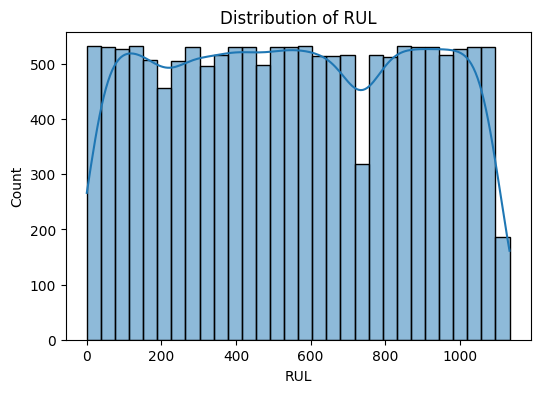

In [7]:
plt.figure(figsize=(6,4))
sns.histplot(df["RUL"],kde=True,bins=30)
plt.title("Distribution of RUL")
plt.show()

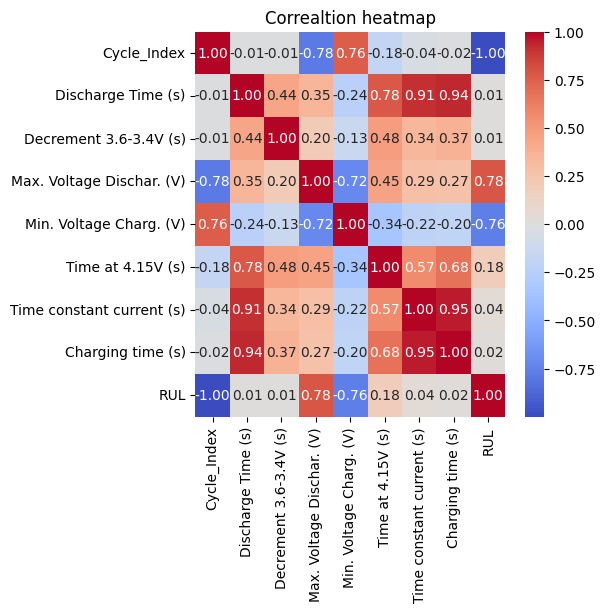

In [8]:
# correlation heatmap
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Correaltion heatmap")
plt.show()

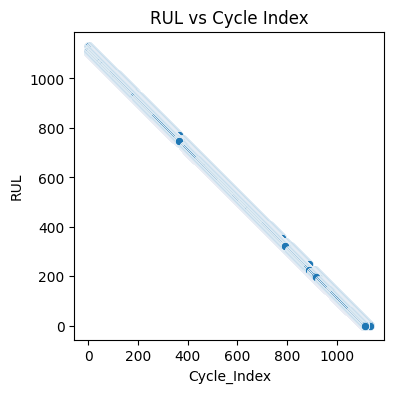

In [9]:
# realtionship with cycle index
plt.figure(figsize=(4,4))
sns.scatterplot(x='Cycle_Index',y="RUL",data=df)
plt.title("RUL vs Cycle Index")
plt.show()

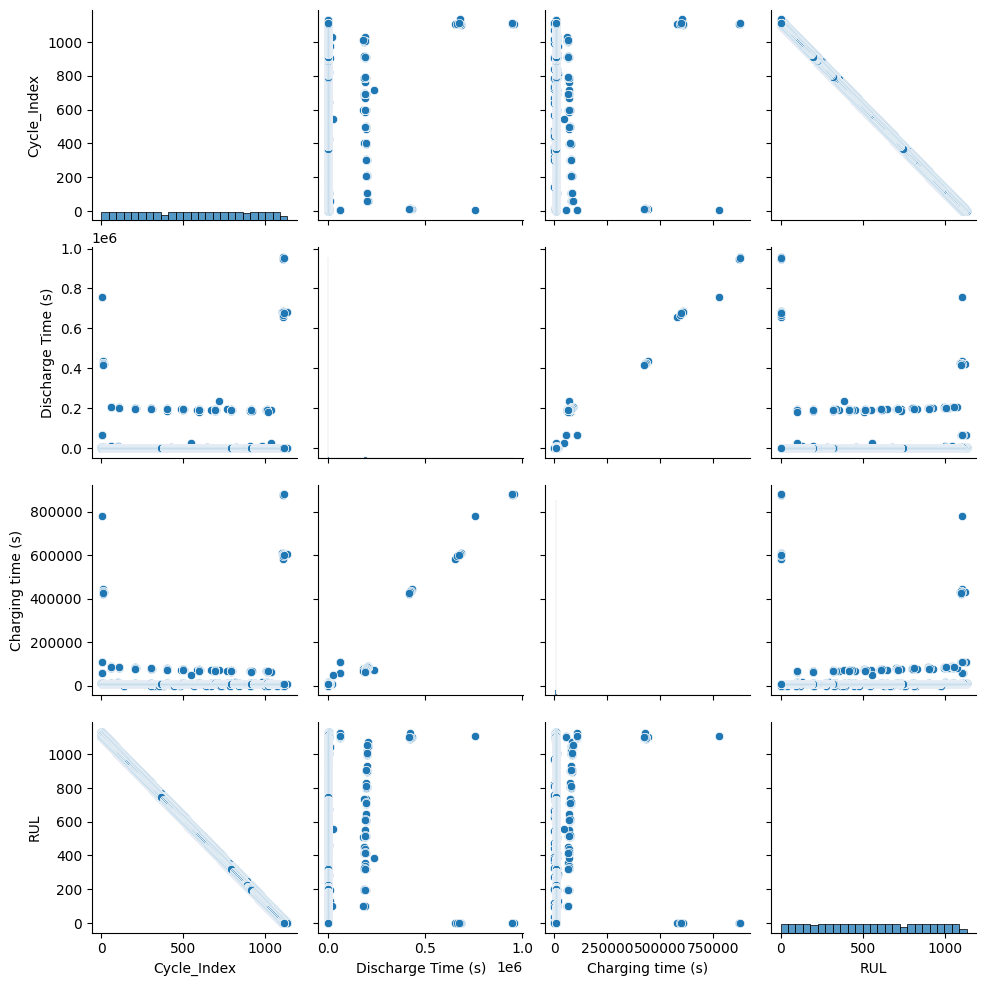

In [10]:
sns.pairplot(df[["Cycle_Index","Discharge Time (s)","Charging time (s)","RUL"]])
plt.show()

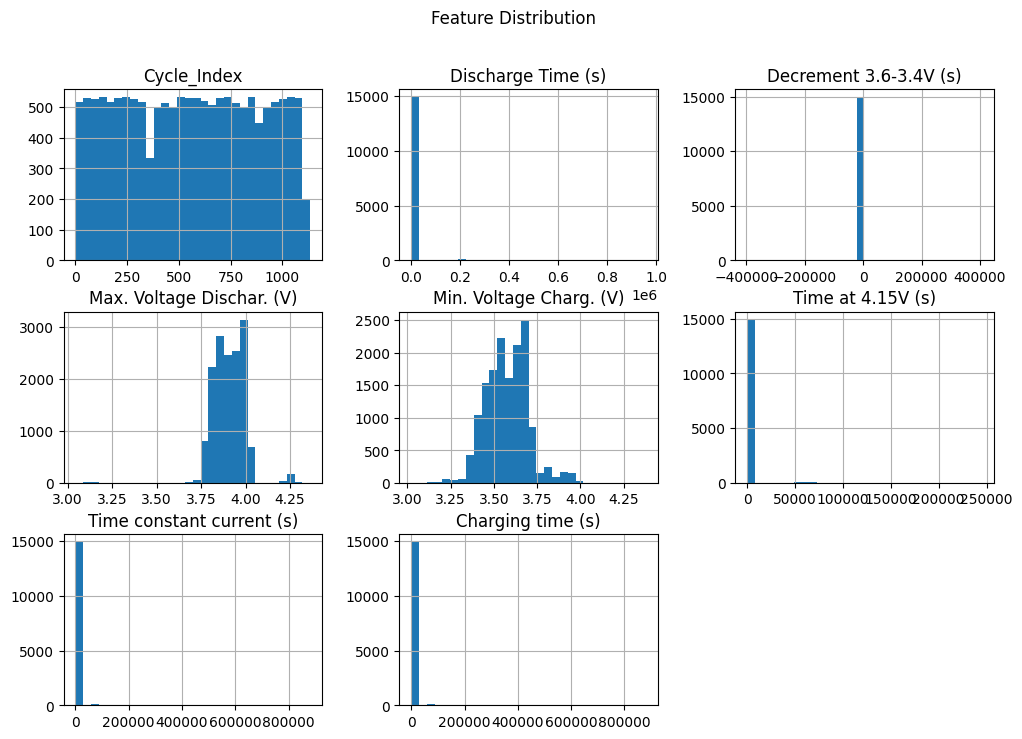

In [11]:
df.drop(columns=["RUL"]).hist(figsize=(12,8),bins=30)
plt.suptitle("Feature Distribution")
plt.show()

## Train Test Split

In [12]:
target_col = "RUL"
y= df[target_col]

# spit numric/categorical
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if target_col in num_cols: num_cols.remove(target_col)
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

X = df.drop(columns=[target_col])

In [13]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [14]:
# for nuemric
numeric_transfomer = Pipeline(
    steps=[('Imputer',SimpleImputer(strategy='median')),
           ("Scaler",StandardScaler())
])

# for categorical
categorical_tranformer = Pipeline(
    steps=[('Imputer',SimpleImputer(strategy='most_frquent')),
           ('OneHot',OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer([
    ('NUm',numeric_transfomer,num_cols),
    ('Cat',categorical_tranformer,cat_cols)
])

In [15]:
preprocessor

,transformers,"[('NUm', ...), ('Cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


## Models to comapre

In [16]:
# for ridge
ridge_pipe = Pipeline([
    ('Preprocessor',preprocessor),
    ('model',Ridge())
])

# for random froest
rf_pipe = Pipeline([
    ('preprocessor',preprocessor),
    ('model',RandomForestRegressor(n_estimators=50,max_depth=10,random_state=42))
])

## Train Ridge

In [17]:
ridge_pipe.fit(X_train,y_train)
ridge_pred = ridge_pipe.predict(X_test)
ridge_metrices={
    "rmse":mean_squared_error(y_test,ridge_pred),
    "mae":mean_absolute_error(y_test,ridge_pred),
    "r2":r2_score(y_test,ridge_pred)
}
print(ridge_metrices)

{'rmse': 54.55450136909109, 'mae': 4.6426047277013165, 'r2': 0.9994733390020157}


## Train RandomForest

In [18]:
rf_pipe.fit(X_train,y_train)
rf_pred = rf_pipe.predict(X_test)
rf_metrices={
    "rmse":mean_squared_error(y_test,rf_pred),
    "mae":mean_absolute_error(y_test,rf_pred),
    "r2":r2_score(y_test,rf_pred)
}
print(rf_metrices)

{'rmse': 20.844307740438918, 'mae': 2.877001007312604, 'r2': 0.99979877217019}


## Pick Best Model

In [19]:
results = {'Ridge':ridge_metrices , 'Random Forest':rf_metrices}
best_model = min(results,key=lambda n:results[n]['rmse'])
print("Model Comparison",results)
print("Best Model",best_model)

final_pipeline = ridge_pipe if best_model == 'Ridge' else rf_pipe

Model Comparison {'Ridge': {'rmse': 54.55450136909109, 'mae': 4.6426047277013165, 'r2': 0.9994733390020157}, 'Random Forest': {'rmse': 20.844307740438918, 'mae': 2.877001007312604, 'r2': 0.99979877217019}}
Best Model Random Forest


## Save Model

In [20]:
out_dir = Path("ev_battery_project")
out_dir.mkdir(exist_ok=True)

joblib.dump({
    'Pipeline':final_pipeline,
    'metadata':{
    "cat_cols":cat_cols,
    "num_cols":num_cols,
    "results":results
}
},out_dir/'best_model.joblib')

print("Model Saved to ev_battery_project / best_model.joblib")

Model Saved to ev_battery_project / best_model.joblib


## Score for both Ridge and RandomForest

In [27]:
print(ridge_pipe.score(X_train,y_train)*100)
print(ridge_pipe.score(X_test,y_test)*100)

print(rf_pipe.score(X_train,y_train)*100)
print(rf_pipe.score(X_test,y_test)*100)

99.9521902119467
99.94733390020157
99.99303619400794
99.979877217019


## Predictions

In [ ]:
data_pred = pd.DataFrame([{
    "Cycle_Index": 1,
    "Discharge Time (s)": 2595,
    "Decrement 3.6-3.4V (s)": 1151,
    "Max. Voltage Dischar. (V)": 3.6,
    "Min. Voltage Charg. (V)": 3.2,
    "Time at 4.15V (s)": 5460,
    "Time constant current (s)": 6755,
    "Charging time (s)": 10777
}])


rf_prediction = rf_pipe.predict(data_pred)
print(f"{rf_prediction} cycles")

[1106.58355799] cycles
